# Australian Open 2020: Winner Predictor
## Web Intelligence Course, Ca' Foscari University, A.Y. 2019/2020
#### Diego Chinellato, 867637 - Giorgia Campardo, 867928

In [1]:
%matplotlib inline

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# our modules
from preprocessing import *
from models import *
from reports import *

In [2]:
full_dataset = pd.read_csv('data/dataset.csv', 
                            encoding='utf-8-sig', 
                            dtype=DATA_TYPES,
                            parse_dates=['Date', 'WBD', 'LBD'])
baseline_model(full_dataset)

Player with higher rank wins. Accuracy: 0.34
Player with higher avg bet wins. Accuracy: 0.3
Player with combined bet (B365+PS+Max+Avg) wins. Accuracy: 0.3


In [3]:
full_dataset.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,WElo,WSurfElo,WBD,WHand,WBHand,LElo,LSurfElo,LBD,LHand,LBHand
0,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Lopez F.,...,1783.4,1724.7,NaT,NaN,NaN,NaN,NaN,1984-03-24,R,1.0
1,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,...,1610.9,1611.0,1986-09-07,R,2.0,NaN,NaN,1974-05-05,L,2.0
2,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Bubka S.,...,NaN,NaN,1987-02-10,R,2.0,NaN,NaN,1985-08-07,R,2.0
3,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Marchenko I.,...,1574.9,1561.4,1987-09-08,R,2.0,1597.1,1563.8,1987-08-22,L,2.0
4,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Davydenko N.,...,NaN,NaN,1981-06-02,R,2.0,1891.2,1829.0,1987-05-24,R,2.0


In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23661 entries, 0 to 23660
Data columns (total 52 columns):
ATP           23661 non-null int32
Location      23661 non-null object
Tournament    23661 non-null object
Date          23661 non-null datetime64[ns]
Series        23661 non-null object
Court         23661 non-null object
Surface       23661 non-null object
Round         23661 non-null object
Best of       23661 non-null int32
Winner        23661 non-null object
Loser         23661 non-null object
WRank         23651 non-null float64
LRank         23613 non-null float64
WPts          23653 non-null float64
LPts          23614 non-null float64
W1            23510 non-null float64
L1            23512 non-null float64
W2            23287 non-null float64
L2            23287 non-null float64
W3            11182 non-null float64
L3            11182 non-null float64
W4            2200 non-null float64
L4            2200 non-null float64
W5            816 non-null float64
L5          

In [5]:
full_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ATP,23661.0,33.000338,18.062346,1.000,19.00,33.00,49.00,67.00
Best of,23661.0,3.385698,0.789088,3.000,3.00,3.00,3.00,5.00
WRank,23651.0,56.759545,70.918246,1.000,16.00,40.00,74.00,1890.00
LRank,23613.0,87.169949,109.152555,1.000,34.00,62.00,100.00,2159.00
WPts,23653.0,1987.728111,2476.799826,1.000,693.00,1060.00,2030.00,16950.00
LPts,23614.0,1127.380918,1293.454647,1.000,557.00,789.00,1195.00,16950.00
W1,23510.0,5.806635,1.225256,0.000,6.00,6.00,6.00,7.00
L1,23512.0,4.105095,1.834727,0.000,3.00,4.00,6.00,7.00
W2,23287.0,5.783828,1.245964,0.000,6.00,6.00,6.00,7.00
L2,23287.0,3.952205,1.857315,0.000,3.00,4.00,6.00,7.00


In [6]:
X, Y = preprocess_data(min_date=2014,
                       features_to_drop=['WElo', 'WSurfElo', 'LElo', 'LSurfElo'],
                       labels="duplicate")

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22462 entries, 0 to 22462
Data columns (total 20 columns):
Series            22462 non-null int64
Court             22462 non-null int64
Round             22462 non-null int64
Best of           22462 non-null int32
WRank             22462 non-null int32
LRank             22462 non-null int32
WPts              22462 non-null float64
LPts              22462 non-null float64
WHand             22462 non-null int64
WBHand            22462 non-null int32
LHand             22462 non-null int64
LBHand            22462 non-null int32
WEloCalc          22462 non-null float64
LEloCalc          22462 non-null float64
ProbaElo          22462 non-null float64
Surface__Clay     22462 non-null uint8
Surface__Grass    22462 non-null uint8
Surface__Hard     22462 non-null uint8
GreaterRank       22462 non-null int32
MorePts           22462 non-null int32
dtypes: float64(5), int32(7), int64(5), uint8(3)
memory usage: 2.5 MB


In [8]:
X.head()

,Series,Court,Round,Best of,WRank,LRank,WPts,LPts,WHand,WBHand,LHand,LBHand,WEloCalc,LEloCalc,ProbaElo,Surface__Clay,Surface__Grass,Surface__Hard,GreaterRank,MorePts
0,0,0,1,3,24,72,1393.0,686.0,0,2,0,2,1500.0,1500.0,0.5,0,0,1,1,0
1,0,0,1,3,40,4,1065.0,5790.0,0,2,0,2,1500.0,1500.0,0.5,0,0,1,0,1
2,0,0,1,3,1,74,13030.0,663.0,1,2,0,2,1500.0,1500.0,0.5,0,0,1,1,0
3,0,0,1,3,6,39,4205.0,1090.0,0,1,1,2,1500.0,1500.0,0.5,0,0,1,1,0
4,0,0,1,3,17,68,1915.0,706.0,0,2,0,2,1500.0,1500.0,0.5,0,0,1,1,0


In [9]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Series,22462.0,1.420176,1.503308,0.000000,0.000000,1.000000,2.000000,4.000000
Court,22462.0,0.176654,0.381384,0.000000,0.000000,0.000000,0.000000,1.000000
Round,22462.0,1.533256,2.077895,0.000000,0.000000,1.000000,2.000000,7.000000
Best of,22462.0,3.394978,0.796227,3.000000,3.000000,3.000000,3.000000,5.000000
WRank,22462.0,70.064420,91.566524,1.000000,22.000000,49.000000,87.000000,1921.000000
LRank,22462.0,70.064420,91.566524,1.000000,22.000000,49.000000,87.000000,1921.000000
WPts,22462.0,1622.362523,2073.363275,1.000000,632.000000,938.000000,1650.000000,16950.000000
LPts,22462.0,1622.362523,2073.363275,1.000000,632.000000,938.000000,1650.000000,16950.000000
WHand,22462.0,0.148918,0.356016,0.000000,0.000000,0.000000,0.000000,1.000000
WBHand,22462.0,1.794675,0.403948,1.000000,2.000000,2.000000,2.000000,2.000000


Models construction

Let's split the data into train set, validation set and test set

In [10]:
X_train_l, X_test, Y_train_l, Y_test = train_test_split(X, Y, test_size=0.20)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_l, Y_train_l, test_size=0.25)

Max accuracy (validation, training): (0.708, 0.731)
Criterion: gini
Splitter: best
Max depth: 15
Max leaves: 90
Execution took 1.39 min


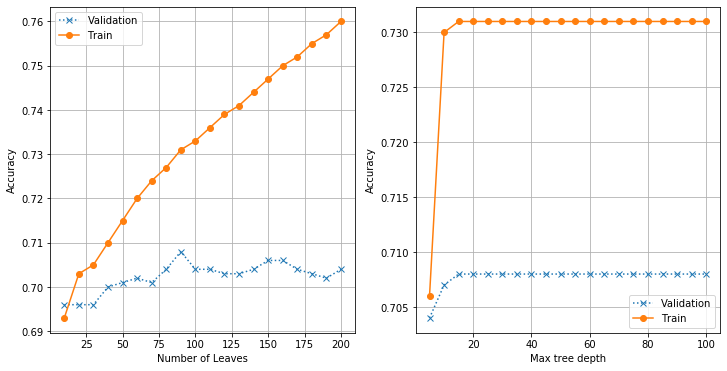

In [11]:
dt = build_decision_tree(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.744, 1.0)
Boostrap: False
N. estimators: 170
Max samples: 0.75
Tree criterion: entropy
Execution took 10.47 min


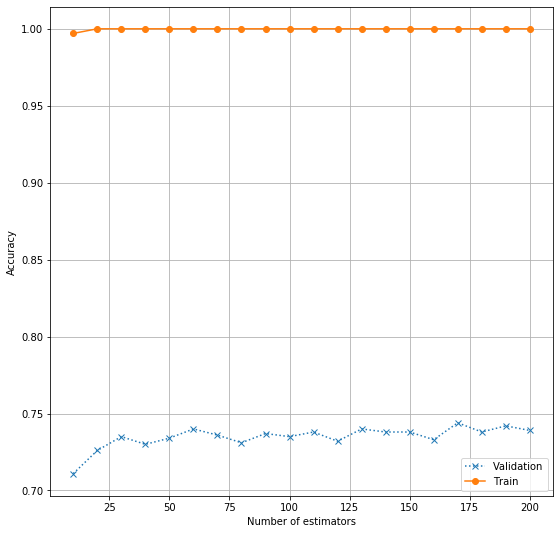

In [12]:
bagged_dt = build_bagging_classifier(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.669, 1.0)
N. estimators: 300
Learning rate: 0.5
Tree criterion: entropy
Execution took 0.25 min


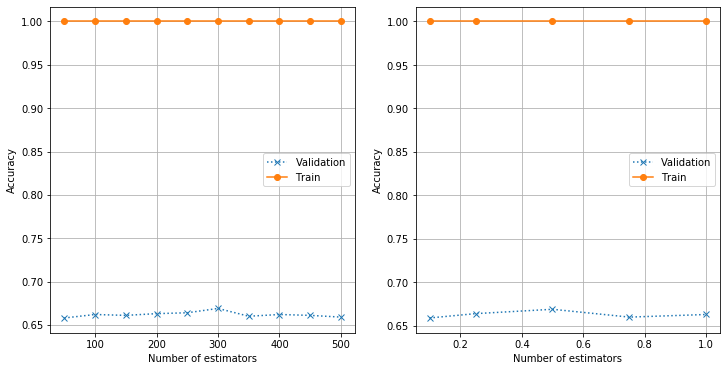

In [13]:
boosted_dt = build_adaboost(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.739, 0.999)
N. estimators: 250
Criterion: entropy
Bootstrap: True
Features criterion (None means all features): None
Max tree depth: 20
Execution took 6.99 min


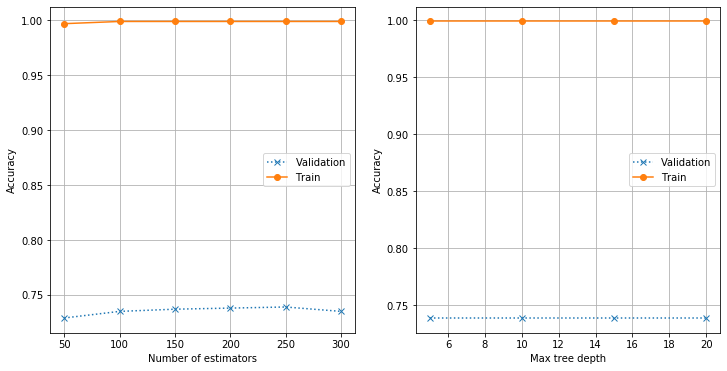

In [14]:
rf = build_random_forest(X_train, Y_train, X_valid, Y_valid)

In [15]:
models = [('Decision tree', dt), 
          ('Bagging', bagged_dt),
          ('AdaBoost', boosted_dt),
          ('Random Forest', rf)]

Approximate decision boundaries for the different models


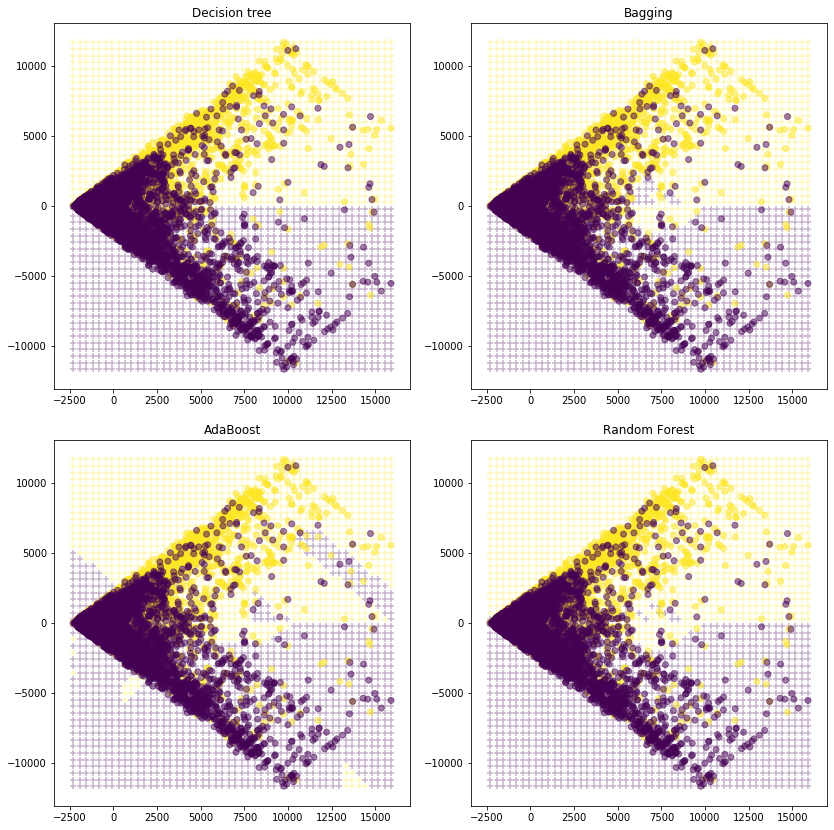

In [16]:
model_decision_boundary(models, X, Y)

{'Series': 0.022, 'Court': 0.01, 'Round': 0.027, 'Best of': 0.006, 'WRank': 0.065, 'LRank': 0.065, 'WPts': 0.101, 'LPts': 0.101, 'WHand': 0.008, 'WBHand': 0.01, 'LHand': 0.008, 'LBHand': 0.01, 'WEloCalc': 0.123, 'LEloCalc': 0.126, 'ProbaElo': 0.208, 'Surface__Clay': 0.009, 'Surface__Grass': 0.007, 'Surface__Hard': 0.009, 'GreaterRank': 0.0, 'MorePts': 0.081}
{'Series': 0.023, 'Court': 0.011, 'Round': 0.027, 'Best of': 0.006, 'WRank': 0.058, 'LRank': 0.062, 'WPts': 0.098, 'LPts': 0.103, 'WHand': 0.008, 'WBHand': 0.011, 'LHand': 0.006, 'LBHand': 0.01, 'WEloCalc': 0.132, 'LEloCalc': 0.141, 'ProbaElo': 0.205, 'Surface__Clay': 0.009, 'Surface__Grass': 0.007, 'Surface__Hard': 0.012, 'GreaterRank': 0.0, 'MorePts': 0.071}
{'Series': 0.002, 'Court': 0.0, 'Round': 0.002, 'Best of': 0.005, 'WRank': 0.012, 'LRank': 0.013, 'WPts': 0.068, 'LPts': 0.066, 'WHand': 0.0, 'WBHand': 0.002, 'LHand': 0.0, 'LBHand': 0.0, 'WEloCalc': 0.059, 'LEloCalc': 0.075, 'ProbaElo': 0.342, 'Surface__Clay': 0.0, 'Surface_

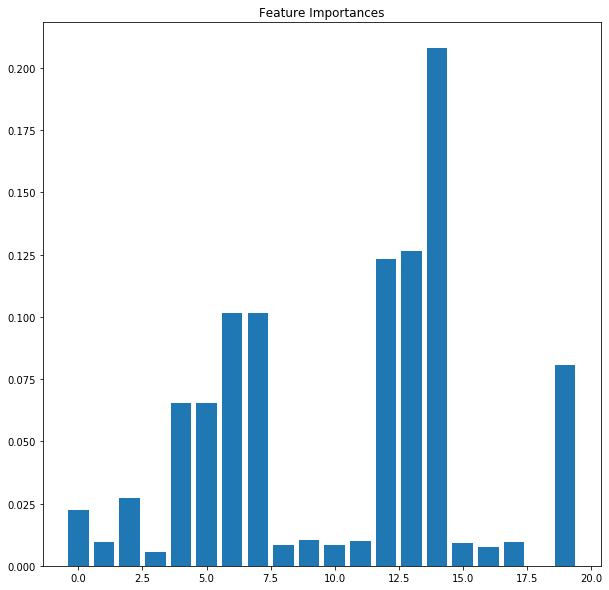

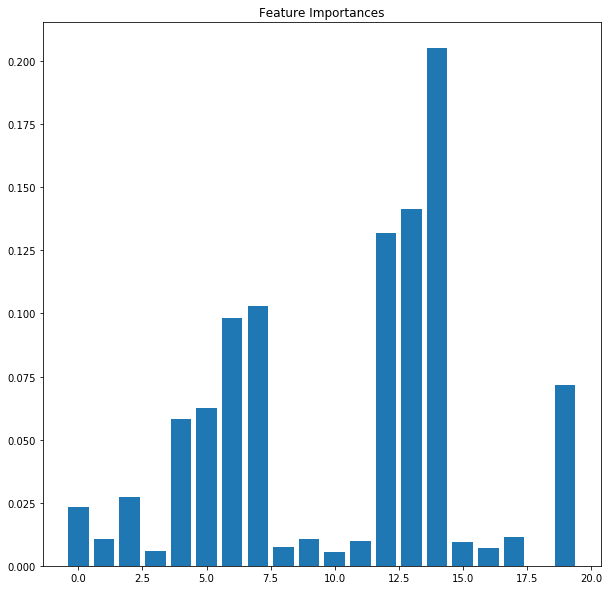

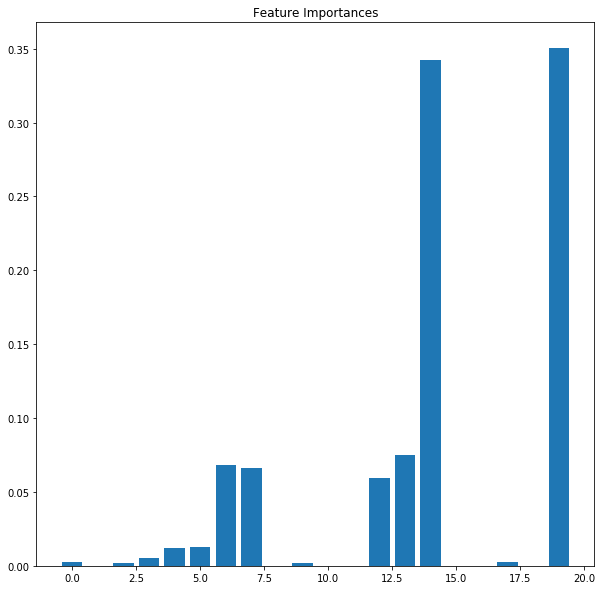

In [17]:
feature_importance(X, rf)
feature_importance(X, boosted_dt)
feature_importance(X, dt)

In [18]:
report(X_test, Y_test, models)

Algorithm: Decision tree
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      2246
           1       0.68      0.74      0.71      2247

    accuracy                           0.70      4493
   macro avg       0.70      0.70      0.70      4493
weighted avg       0.70      0.70      0.70      4493


Algorithm: Bagging
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      2246
           1       0.75      0.76      0.75      2247

    accuracy                           0.75      4493
   macro avg       0.75      0.75      0.75      4493
weighted avg       0.75      0.75      0.75      4493


Algorithm: AdaBoost
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2246
           1       0.67      0.66      0.67      2247

    accuracy                           0.67      4493
   macro avg       0.67      0.67      0.67      4493
weighted